In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First Training

In [2]:
history_df_01 = pd.read_csv('using-standard-bert-history-01.csv')

In [3]:
history_df_01

,Unnamed: 0,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0,2.225659,1.491864,1.637047,1.279472
1,1,1.579661,1.256846,1.285953,1.133999
2,2,1.478330,1.215866,1.145155,1.070119
3,3,1.419335,1.191359,1.074206,1.036439
4,4,1.362068,1.167077,1.049023,1.024218
5,5,1.308563,1.143925,1.069265,1.034052
6,6,1.291807,1.136577,1.113246,1.055104
7,7,1.268902,1.126455,1.054924,1.027095
8,8,1.258151,1.121673,1.014441,1.007195
9,9,1.247033,1.116706,0.977125,0.988496


In [4]:
train_df = history_df_01[['loss']]

In [5]:
val_df = history_df_01[['val_loss']]

In [6]:
val_df.head()

,val_loss
0,1.637047
1,1.285953
2,1.145155
3,1.074206
4,1.049023


In [7]:
df = train_df.join(val_df['val_loss'])

In [8]:
df.head()

,loss,val_loss
0,2.225659,1.637047
1,1.579661,1.285953
2,1.478330,1.145155
3,1.419335,1.074206
4,1.362068,1.049023


In [9]:
df = df.rename(columns={'loss': 'BERT Loss', 'val_loss': 'BERT Validation Loss'})

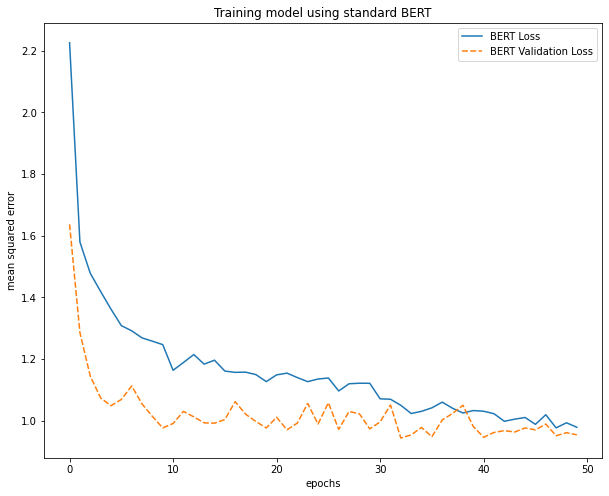

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=df)
ax.set(xlabel='epochs', ylabel='mean squared error')
ax.set_title('Training model using standard BERT')
plt.show()

# ALBERT

In [11]:
history_df_02 = pd.read_csv('using-standard-albert-history-01.csv')

In [12]:
train_df = history_df_02[['loss']]
val_df = history_df_02[['val_loss']]
df_2 = train_df.join(val_df['val_loss'])
df_2 = df_2.rename(columns={'loss': 'ALBERT Loss', 'val_loss': 'ALBERT Validation Loss'})

In [13]:
df_2.head()

,ALBERT Loss,ALBERT Validation Loss
0,1.845055,1.008242
1,1.415635,0.884522
2,1.282790,0.806176
3,1.208100,0.790647
4,1.172064,0.765293


In [14]:
df_new = pd.concat([df, df_2], axis=1)

In [15]:
df_new

,BERT Loss,BERT Validation Loss,ALBERT Loss,ALBERT Validation Loss
0,2.225659,1.637047,1.845055,1.008242
1,1.579661,1.285953,1.415635,0.884522
2,1.478330,1.145155,1.282790,0.806176
3,1.419335,1.074206,1.208100,0.790647
4,1.362068,1.049023,1.172064,0.765293
5,1.308563,1.069265,1.111248,0.761852
6,1.291807,1.113246,1.095008,0.740005
7,1.268902,1.054924,1.120349,0.746437
8,1.258151,1.014441,1.040660,0.741219
9,1.247033,0.977125,1.021405,0.812946


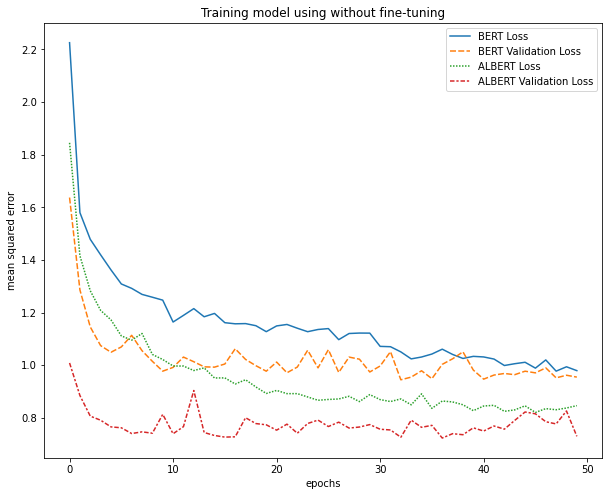

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=df_new)
ax.set(xlabel='epochs', ylabel='mean squared error')
ax.set_title('Training models using without fine-tuning')
plt.show()